In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import pointbiserialr
from sklearn.utils import resample
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import spearmanr, pearsonr
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import dataset and store in variable dataset. View the statistics overview of the dataset

cleaned_dataset = pd.read_csv("/Users/moo/Desktop/MSc Business Analytics/BEMM457 Topics in business analytics/Final project/BEMM457 - Analysis on factors affecting high-school student performance and alcoholism/cleaned_dataset.csv")
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    634 non-null    int64  
 1   Gender                        634 non-null    int64  
 2   Parental_Status               634 non-null    int64  
 3   Mother_Education              634 non-null    int64  
 4   Father_Education              634 non-null    int64  
 5   Weekly_Study_Time             634 non-null    int64  
 6   Extra_Educational_Support     634 non-null    int64  
 7   Parental_Educational_Support  634 non-null    int64  
 8   Private_Tutoring              634 non-null    int64  
 9   Extracurricular_Activities    634 non-null    int64  
 10  Desire_Graduate_Education     634 non-null    int64  
 11  Good_Family_Relationship      634 non-null    int64  
 12  Alcohol_Weekdays              634 non-null    int64  
 13  Alcoh

In [251]:
# Check categorical variables group sizes to determine the need for resampling

categorical_columns = [
    "Gender", "Parental_Status", "Mother_Education", "Father_Education",
    "Extra_Educational_Support", "Parental_Educational_Support",
    "Private_Tutoring", "Extracurricular_Activities", "Desire_Graduate_Education",
    "Alcohol_Weekdays", "Alcohol_Weekends", "Good_Family_Relationship", 
    "Weekly_Study_Time"
]

for col in categorical_columns:
    print(f"Group sizes for {col}:\n", cleaned_dataset[col].value_counts())
    print("-" * 50)

Group sizes for Gender:
 Gender
0    374
1    260
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Parental_Status:
 Parental_Status
0    556
1     78
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Mother_Education:
 Mother_Education
3    185
5    173
2    138
4    138
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Father_Education:
 Father_Education
3    205
2    172
4    130
5    127
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Extra_Educational_Support:
 Extra_Educational_Support
0    568
1     66
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Parental_Educational_Support:
 Parental_Educational_Support
1    390
0    244
Name: count, dtype: int64
--------------------------------------------------
Group sizes for Private_Tutoring:
 Private_Tutoring
0    595
1

/var/folders/zl/q3jfwlms76dfjrk9dywsgcmm0000gn/T/ipykernel_1651/1774517043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_dataset, x=col, ax=axes[i], palette="Blues", legend=False)
/var/folders/zl/q3jfwlms76dfjrk9dywsgcmm0000gn/T/ipykernel_1651/1774517043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_dataset, x=col, ax=axes[i], palette="Blues", legend=False)
/var/folders/zl/q3jfwlms76dfjrk9dywsgcmm0000gn/T/ipykernel_1651/1774517043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_

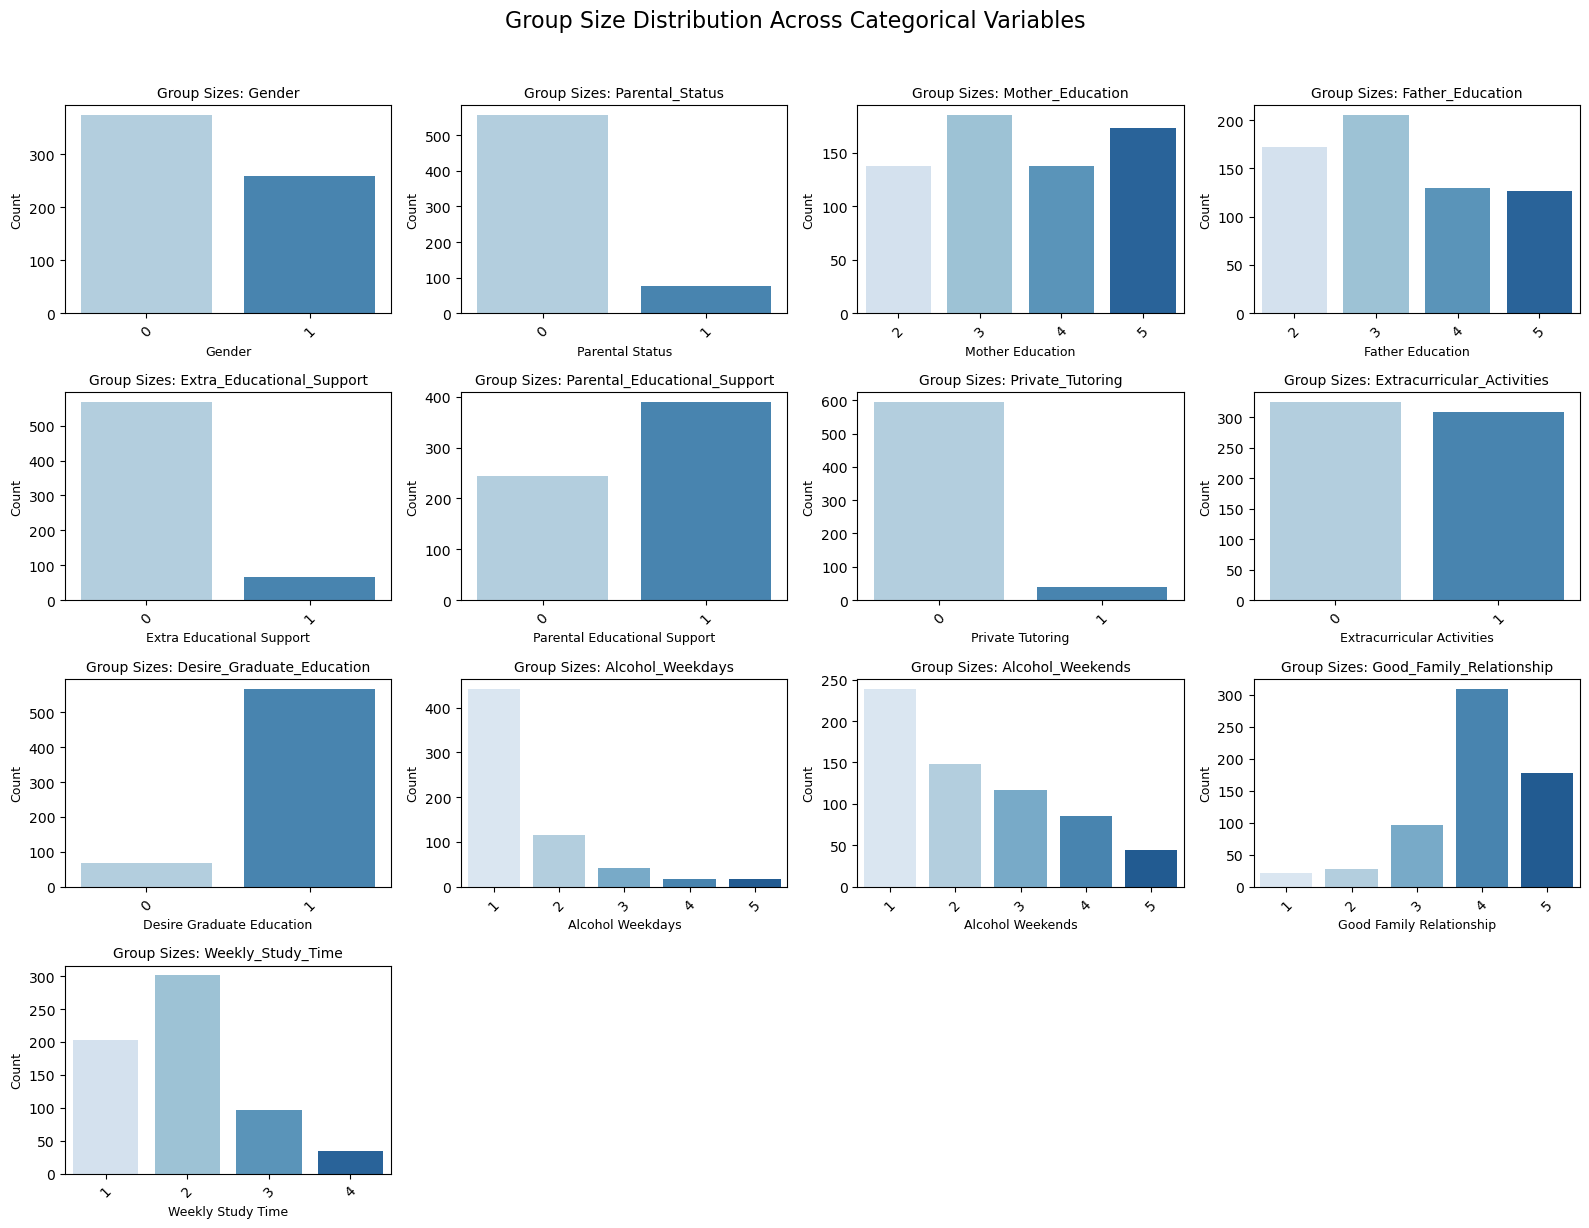

In [253]:
#Plotting categorical variable group sizes to determine imbalance

categorical_columns = [
    "Gender", "Parental_Status", "Mother_Education", "Father_Education",
    "Extra_Educational_Support", "Parental_Educational_Support",
    "Private_Tutoring", "Extracurricular_Activities", "Desire_Graduate_Education",
    "Alcohol_Weekdays", "Alcohol_Weekends", "Good_Family_Relationship", 
    "Weekly_Study_Time"
]

n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=cleaned_dataset, x=col, ax=axes[i], palette="Blues", legend=False)
    axes[i].set_title(f"Group Sizes: {col}", fontsize=10)
    axes[i].set_xlabel(col.replace('_', ' '), fontsize=9)
    axes[i].set_ylabel("Count", fontsize=9)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Group Size Distribution Across Categorical Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [254]:
#Biserial correlation for numerical variable against pass/fail column (Table 5)

corr, p_value = pointbiserialr(cleaned_dataset["School_Absence_BoxCox"], cleaned_dataset["Pass_Fail"])

print("Point-Biserial Correlation between School_Absence_BoxCox and Pass/Fail:")
print("Correlation Coefficient:", round(corr, 4))
print("P-Value:", round(p_value, 4))

Point-Biserial Correlation between School_Absence_BoxCox and Pass/Fail:
Correlation Coefficient: -0.1097
P-Value: 0.0057


In [255]:
#Running bootstrap t-test for binary varibles against pass/fail column (Table 6)

def bootstrap_ttest(data, variable, target, n_iterations=1000):
    t_statistics = []
    for _ in range(n_iterations):
        sample = resample(data, replace=True, random_state=None)
        group_0 = sample[sample[variable] == 0][target]
        group_1 = sample[sample[variable] == 1][target]
        t_stat, _ = ttest_ind(group_0, group_1, equal_var=False, nan_policy='omit')
        t_statistics.append(t_stat)
    return np.mean(t_statistics), np.percentile(t_statistics, [2.5, 97.5])

binary_variables = [
    "Extra_Educational_Support",
    "Parental_Educational_Support",
    "Private_Tutoring",
    "Extracurricular_Activities",
    "Desire_Graduate_Education"
]

bootstrap_results = {}

for var in binary_variables:
    mean_t_stat, conf_interval = bootstrap_ttest(cleaned_dataset, var, "Pass_Fail")
    bootstrap_results[var] = {
        "Mean T-Statistic": round(mean_t_stat, 4),
        "95% CI": [round(conf_interval[0], 4), round(conf_interval[1], 4)]
    }

for var, result in bootstrap_results.items():
    print(f"Variable: {var}")
    print(f"  Mean T-Statistic: {result['Mean T-Statistic']}")
    print(f"  95% Confidence Interval: {result['95% CI']}")
    print("-" * 50)

Variable: Extra_Educational_Support
  Mean T-Statistic: 0.1359
  95% Confidence Interval: [-1.892, 2.1049]
--------------------------------------------------
Variable: Parental_Educational_Support
  Mean T-Statistic: -1.2101
  95% Confidence Interval: [-3.1721, 0.6683]
--------------------------------------------------
Variable: Private_Tutoring
  Mean T-Statistic: 0.1447
  95% Confidence Interval: [-2.0209, 1.9763]
--------------------------------------------------
Variable: Extracurricular_Activities
  Mean T-Statistic: -2.0794
  95% Confidence Interval: [-4.0506, -0.034]
--------------------------------------------------
Variable: Desire_Graduate_Education
  Mean T-Statistic: -8.759
  95% Confidence Interval: [-12.1329, -5.7617]
--------------------------------------------------


In [258]:
#Running bootstrap t-test for nominal variables against pass/fail column (Table 7)

nominal_variables = ["Gender", "Parental_Status"]

bootstrap_results_nominal = {}

n_bootstrap = 1000

for var in nominal_variables:
    group_0 = cleaned_dataset[cleaned_dataset[var] == 0]["Pass_Fail"].values
    group_1 = cleaned_dataset[cleaned_dataset[var] == 1]["Pass_Fail"].values
    
    t_stats = []
    
    for _ in range(n_bootstrap):
        sample_0 = np.random.choice(group_0, size=len(group_0), replace=True)
        sample_1 = np.random.choice(group_1, size=len(group_1), replace=True)
        
        t_stat, _ = ttest_ind(sample_0, sample_1, equal_var=False, nan_policy="omit")
        t_stats.append(t_stat)
    
    mean_t_stat = np.mean(t_stats)
    ci_lower = np.percentile(t_stats, 2.5)
    ci_upper = np.percentile(t_stats, 97.5)
    
    bootstrap_results_nominal[var] = {
        "Mean T-Statistic": round(mean_t_stat, 4),
        "95% CI": (round(ci_lower, 4), round(ci_upper, 4))
    }

for var, result in bootstrap_results_nominal.items():
    print("Variable:", var)
    print("  Mean T-Statistic:", result["Mean T-Statistic"])
    print("  95% Confidence Interval:", result["95% CI"])
    print("-" * 50)

Variable: Gender
  Mean T-Statistic: 3.0025
  95% Confidence Interval: (1.1747, 4.937)
--------------------------------------------------
Variable: Parental_Status
  Mean T-Statistic: -0.5561
  95% Confidence Interval: (-2.6361, 1.4261)
--------------------------------------------------


In [259]:
#Running bootstrap ANOVA for ordinal variables against pass/fail column (Table 8)

anova_variables = [
    "Mother_Education", "Father_Education", "Weekly_Study_Time",
    "Good_Family_Relationship", "Alcohol_Weekdays", "Alcohol_Weekends"
]

def bootstrap_anova(data, variable, target, n_iterations=1000):
    observed_f_stat, observed_p_val = f_oneway(
        *[data[data[variable] == level][target] for level in data[variable].unique()]
    )
    boot_f_stats = []

    for _ in range(n_iterations):
        boot_data = resample(data)
        f_stat, _ = f_oneway(
            *[boot_data[boot_data[variable] == level][target] for level in boot_data[variable].unique()]
        )
        boot_f_stats.append(f_stat)

    ci_lower = np.percentile(boot_f_stats, 2.5)
    ci_upper = np.percentile(boot_f_stats, 97.5)

    return observed_f_stat, observed_p_val, ci_lower, ci_upper

anova_results = {}

for var in anova_variables:
    f_stat, p_val, ci_lower, ci_upper = bootstrap_anova(cleaned_dataset, var, "Pass_Fail")
    anova_results[var] = {
        "F-Statistic": f_stat,
        "P-Value": p_val,
        "95% CI for F-Statistic": (ci_lower, ci_upper)
    }

for variable, result in anova_results.items():
    print("Variable:", variable)
    print("  F-Statistic:", round(result["F-Statistic"], 4))
    print("  P-Value:", round(result["P-Value"], 4))
    print("  95% CI for F-Statistic:", result["95% CI for F-Statistic"])
    print("-" * 50)

Variable: Mother_Education
  F-Statistic: 11.8963
  P-Value: 0.0
  95% CI for F-Statistic: (5.989485821212001, 22.522102286706748)
--------------------------------------------------
Variable: Father_Education
  F-Statistic: 14.8069
  P-Value: 0.0
  95% CI for F-Statistic: (8.213215643628157, 26.675584525378927)
--------------------------------------------------
Variable: Weekly_Study_Time
  F-Statistic: 11.6999
  P-Value: 0.0
  95% CI for F-Statistic: (5.6520074517494665, 22.170773019005853)
--------------------------------------------------
Variable: Good_Family_Relationship
  F-Statistic: 2.7106
  P-Value: 0.0293
  95% CI for F-Statistic: (0.7648388522123523, 9.140557173895035)
--------------------------------------------------
Variable: Alcohol_Weekdays
  F-Statistic: 3.9392
  P-Value: 0.0036
  95% CI for F-Statistic: (1.2208625627306964, 11.08668390232604)
--------------------------------------------------
Variable: Alcohol_Weekends
  F-Statistic: 2.6259
  P-Value: 0.0337
  95% CI 

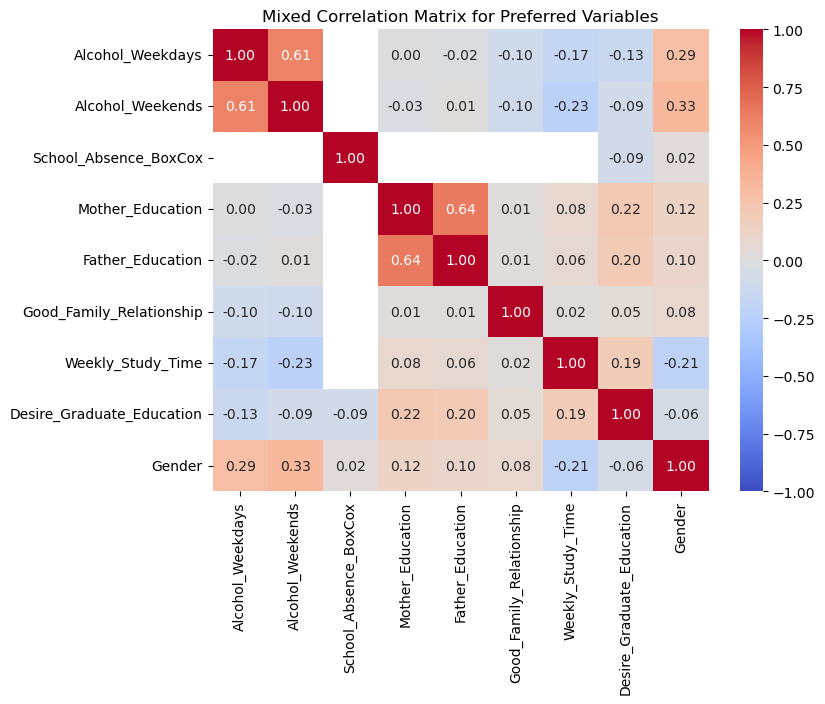

In [260]:
#Figure 12: Mixed correlation matrix for independent variables

preferred_variables = [
    "Alcohol_Weekdays",
    "Alcohol_Weekends",
    "School_Absence_BoxCox",
    "Mother_Education",
    "Father_Education",
    "Good_Family_Relationship",
    "Weekly_Study_Time",
    "Desire_Graduate_Education",
    "Gender"
]

correlation_matrix = pd.DataFrame(index=preferred_variables, columns=preferred_variables)

label_encoders = {}
for col in ["Gender"]:
    label_encoders[col] = LabelEncoder()
    cleaned_dataset[col] = label_encoders[col].fit_transform(cleaned_dataset[col])

for var1 in preferred_variables:
    for var2 in preferred_variables:
        if var1 == var2:
            correlation_matrix.loc[var1, var2] = 1.0 
        else:
            if var1 == "School_Absence_Log" and var2 == "School_Absence_Log":
                correlation, _ = pearsonr(cleaned_dataset[var1], cleaned_dataset[var2])
            elif var1 in ["Alcohol_Weekdays", "Alcohol_Weekends", "Mother_Education", 
                          "Father_Education", "Good_Family_Relationship", "Weekly_Study_Time"] and \
                 var2 in ["Alcohol_Weekdays", "Alcohol_Weekends", "Mother_Education", 
                          "Father_Education", "Good_Family_Relationship", "Weekly_Study_Time"]:
                correlation, _ = spearmanr(cleaned_dataset[var1], cleaned_dataset[var2])
            elif var1 in ["Desire_Graduate_Education", "Gender"] or var2 in ["Desire_Graduate_Education", "Gender"]:
                correlation, _ = pearsonr(cleaned_dataset[var1], cleaned_dataset[var2])
            else:
                correlation = np.nan
            correlation_matrix.loc[var1, var2] = correlation

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Mixed Correlation Matrix for Preferred Variables")
plt.show()


In [261]:
#Figure 13: Multicollinearity analysis for highly correlated independent variables

vif_dataset = cleaned_dataset[["Alcohol_Weekdays", "Alcohol_Weekends", 
                                "Mother_Education", "Father_Education"]]

def calculate_vif_tolerance(dataframe):
    vif_tolerance_data = pd.DataFrame()
    vif_tolerance_data["Variable"] = dataframe.columns
    vif_tolerance_data["VIF"] = [
        variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])
    ]
    vif_tolerance_data["Tolerance"] = 1 / vif_tolerance_data["VIF"]
    return vif_tolerance_data

vif_tolerance_result = calculate_vif_tolerance(vif_dataset)

print(vif_tolerance_result)


           Variable        VIF  Tolerance
0  Alcohol_Weekdays   5.624489   0.177794
1  Alcohol_Weekends   6.313738   0.158385
2  Mother_Education  16.314948   0.061293
3  Father_Education  16.417465   0.060911
